In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
origin_airport = 'LAX'
dest_airport = 'JFK'

In [ ]:
i = 2010
j=1
air_df = pd.read_csv('/content/gdrive/My Drive/NEU_DAE/DAE_Projects/IE7275/Project/Data_new/' + str(i) + '/' + str(i) + '_' + str(j) + '.csv')              #Jeff
air_df

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 24
0,2010,1,15,5,2010-01-15,9E,89089E,SAT,MEM,1610,1605.0,-5.0,1800,1749.0,-11.0,0.0,110.0,104.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,1,16,6,2010-01-16,9E,80199E,SAT,MEM,1610,1609.0,-1.0,1800,1803.0,3.0,0.0,110.0,114.0,91.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,1,17,7,2010-01-17,9E,89289E,SAT,MEM,1610,1556.0,-14.0,1800,1735.0,-25.0,0.0,110.0,99.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2010,1,18,1,2010-01-18,9E,84589E,SAT,MEM,1610,1610.0,0.0,1800,1805.0,5.0,0.0,110.0,115.0,88.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2010,1,19,2,2010-01-19,9E,88969E,SAT,MEM,1610,1609.0,-1.0,1800,1756.0,-4.0,0.0,110.0,107.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521804,2010,1,18,1,2010-01-18,YV,N513MJ,DEN,ATL,1915,1914.0,-1.0,1,2349.0,-12.0,0.0,166.0,155.0,138.0,NaN,NaN,NaN,NaN,NaN,NaN
521805,2010,1,19,2,2010-01-19,YV,N503MJ,DEN,ATL,1915,1913.0,-2.0,1,2354.0,-7.0,0.0,166.0,161.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN
521806,2010,1,20,3,2010-01-20,YV,N522LR,DEN,ATL,1915,1914.0,-1.0,1,2352.0,-9.0,0.0,166.0,158.0,141.0,NaN,NaN,NaN,NaN,NaN,NaN
521807,2010,1,22,5,2010-01-22,YV,N509MJ,DEN,ATL,1913,1912.0,-1.0,2359,2347.0,-12.0,0.0,166.0,155.0,134.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
air_final = pd.DataFrame()
print(air_final.empty)
for i in range(2010,2021):
  for j in range(1,13):
    print (str(i) + '  ' + str(j))
    air_df = pd.read_csv('/content/gdrive/My Drive/NEU_DAE/DAE_Projects/IE7275/Project/Data_new/' + str(i) + '/' + str(i) + '_' + str(j) + '.csv')              #Jeff
    #air_df = pd.read_csv('/content/gdrive/My Drive/IE7275/Project/Dataset/' + str(i) + '/' + str(i) + '_' + str(j) + '.csv')                                   #Sankesh
    air_df['FL_DATE'] = pd.to_datetime(air_df['FL_DATE'], format = '%Y-%m-%d')

    #air_df.insert(0, 'DAY', air_df['FL_DATE'].dt.day)
    #air_df.insert(1, 'MONTH', air_df['FL_DATE'].dt.month)
    #air_df.insert(2, 'YEAR', air_df['FL_DATE'].dt.year)
    #air_df.insert(3, 'Week day', air_df['FL_DATE'].dt.dayofweek)

    air_filter = air_df.loc[(air_df['ORIGIN'] == origin_airport),:]
#    air_filter = air_df.loc[(air_df['ORIGIN'] == origin_airport) & (air_df['DEST'] == dest_airport), :]
#    air_t = air_filter.loc[(air_df['CANCELLED'] == 0) & (air_df['DIVERTED'] == 0), :].drop(columns = ['CANCELLED', 'DIVERTED','CANCELLATION_CODE','FL_DATE',
#                                                                                                'OP_UNIQUE_CARRIER','OP_CARRIER_FL_NUM','ORIGIN_AIRPORT_ID','ORIGIN_CITY_NAME',
#                                                                                                'ORIGIN_STATE_NM','DEST_AIRPORT_ID','DEST_CITY_NAME','DEST_STATE_NM','FLIGHTS',
#                                                                                                'Unnamed: 30'])
    air_t = air_filter.loc[(air_df['CANCELLED'] == 0), :].drop(columns = ['FL_DATE', 'CANCELLED','Unnamed: 24'])
    if air_final.empty:
      air_final = air_t
    else:
      air_final = pd.concat([air_final, air_t]) 


True
2010  1
2010  2
2010  3
2010  4
2010  5
2010  6
2010  7
2010  8
2010  9
2010  10
2010  11
2010  12
2011  1
2011  2
2011  3
2011  4
2011  5
2011  6
2011  7
2011  8
2011  9
2011  10
2011  11
2011  12
2012  1
2012  2
2012  3
2012  4
2012  5
2012  6
2012  7
2012  8
2012  9
2012  10
2012  11
2012  12
2013  1
2013  2
2013  3
2013  4
2013  5
2013  6
2013  7
2013  8
2013  9
2013  10
2013  11
2013  12
2014  1
2014  2
2014  3
2014  4
2014  5
2014  6
2014  7
2014  8
2014  9
2014  10
2014  11
2014  12
2015  1
2015  2
2015  3
2015  4
2015  5
2015  6
2015  7
2015  8
2015  9
2015  10
2015  11
2015  12
2016  1
2016  2
2016  3
2016  4
2016  5
2016  6
2016  7
2016  8
2016  9
2016  10
2016  11
2016  12
2017  1
2017  2
2017  3
2017  4
2017  5
2017  6
2017  7
2017  8
2017  9
2017  10
2017  11
2017  12
2018  1
2018  2
2018  3
2018  4
2018  5
2018  6
2018  7
2018  8
2018  9
2018  10
2018  11
2018  12
2019  1
2019  2
2019  3
2019  4
2019  5
2019  6
2019  7
2019  8
2019  9
2019  10
2019  11
2019  12
2020 

In [ ]:
air_final = air_final.reset_index(drop=True)
air_final.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2010,1,1,5,AA,N3EVAA,LAX,ORD,1230.0,1226.0,-4.0,1845.0,1816.0,-29.0,255.0,230.0,209.0,NaN,NaN,NaN,NaN,NaN
1,2010,1,2,6,AA,N3EWAA,LAX,ORD,1230.0,1226.0,-4.0,1845.0,1818.0,-27.0,255.0,232.0,208.0,NaN,NaN,NaN,NaN,NaN
2,2010,1,3,7,AA,N3DTAA,LAX,ORD,1230.0,1229.0,-1.0,1845.0,1833.0,-12.0,255.0,244.0,211.0,NaN,NaN,NaN,NaN,NaN
3,2010,1,4,1,AA,N3EPAA,LAX,ORD,1230.0,1229.0,-1.0,1845.0,1932.0,47.0,255.0,303.0,239.0,0.0,0.0,47.0,0.0,0.0
4,2010,1,5,2,AA,N3DRAA,LAX,ORD,1230.0,1227.0,-3.0,1845.0,1844.0,-1.0,255.0,257.0,224.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
air_final.sample(5)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
1599658,2017,7,30,7,UA,N589UA,LAX,EWR,830.0,825.0,-5.0,1659.0,1647.0,-12.0,329.0,322.0,289.0,NaN,NaN,NaN,NaN,NaN
1313769,2016,3,3,4,AS,N508AS,LAX,SEA,1425.0,1417.0,-8.0,1710.0,1645.0,-25.0,165.0,148.0,124.0,NaN,NaN,NaN,NaN,NaN
1948849,2019,2,8,5,B6,N967JT,LAX,FLL,1540.0,1553.0,13.0,2330.0,2334.0,4.0,290.0,281.0,259.0,NaN,NaN,NaN,NaN,NaN
227914,2011,2,15,2,WN,N629SW,LAX,LAS,2050.0,2052.0,2.0,2150.0,2142.0,-8.0,60.0,50.0,41.0,NaN,NaN,NaN,NaN,NaN
28113,2010,2,16,2,MQ,N838MQ,LAX,SBA,1635.0,1634.0,-1.0,1710.0,1706.0,-4.0,35.0,32.0,19.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
air_final.describe()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,2.256144e+06,2.256144e+06,2.256144e+06,2.256144e+06,2.256144e+06,2.256144e+06,2.256144e+06,2.256144e+06,2.255149e+06,2.250788e+06,2.256144e+06,2.250788e+06,2.250788e+06,423107.000000,423107.000000,423107.000000,423107.000000,423107.000000
mean,2.014825e+03,6.518421e+00,1.573851e+01,3.955698e+00,1.351472e+03,1.346823e+03,9.042006e+00,1.503861e+03,1.483152e+03,3.832666e+00,1.784608e+02,1.732007e+02,1.498041e+02,17.832707,0.806935,12.693567,0.136918,22.609331
std,3.032727e+00,3.420774e+00,8.778931e+00,1.994881e+00,5.264808e+02,5.379700e+02,3.492335e+01,5.626594e+02,5.789148e+02,3.705062e+01,1.000253e+02,9.865874e+01,9.642846e+01,46.415100,11.713616,26.751087,4.339249,41.561164
min,2.010000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-6.200000e+01,1.000000e+00,1.000000e+00,-1.080000e+02,3.000000e+01,2.400000e+01,7.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.012000e+03,4.000000e+00,8.000000e+00,2.000000e+00,9.150000e+02,9.130000e+02,-5.000000e+00,1.132000e+03,1.118000e+03,-1.300000e+01,8.000000e+01,7.700000e+01,5.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.015000e+03,7.000000e+00,1.600000e+01,4.000000e+00,1.310000e+03,1.314000e+03,-1.000000e+00,1.556000e+03,1.547000e+03,-4.000000e+00,1.650000e+02,1.600000e+02,1.360000e+02,2.000000,0.000000,2.000000,0.000000,5.000000
75%,2.017000e+03,9.000000e+00,2.300000e+01,6.000000e+00,1.755000e+03,1.756000e+03,8.000000e+00,1.944000e+03,1.939000e+03,8.000000e+00,2.690000e+02,2.620000e+02,2.350000e+02,18.000000,0.000000,16.000000,0.000000,29.000000
max,2.020000e+03,1.200000e+01,3.100000e+01,7.000000e+00,2.359000e+03,2.400000e+03,2.058000e+03,2.359000e+03,2.400000e+03,2.041000e+03,5.650000e+02,6.310000e+02,4.310000e+02,2041.000000,1521.000000,1335.000000,789.000000,1520.000000


In [ ]:
air_final.CARRIER_DELAY = air_final.CARRIER_DELAY.fillna(value=0)
air_final.WEATHER_DELAY = air_final.WEATHER_DELAY.fillna(value=0)
air_final.NAS_DELAY = air_final.NAS_DELAY.fillna(value=0)
air_final.SECURITY_DELAY = air_final.SECURITY_DELAY.fillna(value=0)
air_final.LATE_AIRCRAFT_DELAY = air_final.LATE_AIRCRAFT_DELAY.fillna(value=0)
air_final.ARR_DELAY = air_final.ARR_DELAY.fillna(value=0)
air_final = air_final.dropna()

In [ ]:
air_final.count()

YEAR                   2250788
MONTH                  2250788
DAY_OF_MONTH           2250788
DAY_OF_WEEK            2250788
OP_UNIQUE_CARRIER      2250788
TAIL_NUM               2250788
ORIGIN                 2250788
DEST                   2250788
CRS_DEP_TIME           2250788
DEP_TIME               2250788
DEP_DELAY              2250788
CRS_ARR_TIME           2250788
ARR_TIME               2250788
ARR_DELAY              2250788
CRS_ELAPSED_TIME       2250788
ACTUAL_ELAPSED_TIME    2250788
AIR_TIME               2250788
CARRIER_DELAY          2250788
WEATHER_DELAY          2250788
NAS_DELAY              2250788
SECURITY_DELAY         2250788
LATE_AIRCRAFT_DELAY    2250788
dtype: int64

In [ ]:
air_vis = air_final.drop(columns=['ORIGIN','DEST'])

In [ ]:
air_vis.sample(5)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
12134,2010,1,6,3,UA,N438UA,1706.0,1720.0,14.0,2020.0,2046.0,26.0,134.0,146.0,113.0,13.0,0.0,12.0,0.0,1.0
1567975,2017,5,3,3,DL,N876DN,1700.0,1700.0,0.0,1947.0,1933.0,-14.0,347.0,333.0,301.0,0.0,0.0,0.0,0.0,0.0
123920,2010,8,4,3,MQ,N855MQ,1430.0,1426.0,-4.0,1520.0,1513.0,-7.0,50.0,47.0,26.0,0.0,0.0,0.0,0.0,0.0
586913,2012,10,8,1,VX,N835VA,2140.0,2137.0,-3.0,545.0,534.0,-11.0,305.0,297.0,280.0,0.0,0.0,0.0,0.0,0.0
826608,2013,11,30,6,MQ,N522MQ,1615.0,1612.0,-3.0,1900.0,1841.0,-19.0,105.0,89.0,76.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
air_vis.cov()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
YEAR,9.198169,-0.190906,-0.043597,-0.004201,0.909861,-8.879324,0.703228,-22.628232,-22.209828,-4.445184,39.531861,34.383338,30.191220,0.765088,0.006577,0.151507,0.007270,0.187116
MONTH,-0.190906,11.703316,0.395821,0.013592,-7.339056,-9.966376,-0.546954,2.508249,2.046114,-0.450225,5.346355,5.442964,4.877881,-0.152701,-0.047422,-0.155586,0.036752,-0.261007
DAY_OF_MONTH,-0.043597,0.395821,77.066529,0.010981,0.645683,-3.007613,1.659171,-9.681479,-14.541487,1.706293,1.978608,2.026124,1.901760,0.259341,0.060135,0.144845,-0.087861,0.865878
DAY_OF_WEEK,-0.004201,0.013592,0.010981,3.979558,8.557591,6.111283,0.580279,6.261049,3.236498,0.574582,2.214332,2.208607,1.988968,0.227453,-0.000288,-0.039496,0.021772,0.349408
CRS_DEP_TIME,0.909861,-7.339056,0.645683,8.557591,277244.963728,262821.638539,1279.521957,67142.129910,55149.262553,1275.232909,-4554.403773,-4558.786609,-4070.514374,128.073075,0.874701,-61.425769,0.421323,910.718621
DEP_TIME,-8.879324,-9.966376,-3.007613,6.111283,262821.638539,289483.757641,1697.227061,80708.072190,68450.901978,1720.656515,-5724.709071,-5701.308779,-5159.392244,175.119018,-3.637503,53.795042,-0.674965,1158.305473
DEP_DELAY,0.703228,-0.546954,1.659171,0.580279,1279.521957,1697.227061,1214.349924,959.752190,-388.732853,1213.007308,25.886367,24.544764,16.734502,499.499995,26.440498,132.793334,3.825114,459.206171
CRS_ARR_TIME,-22.628232,2.508249,-9.681479,6.261049,67142.129910,80708.072190,959.752190,316721.866959,278005.435596,1067.030846,-3553.894653,-3446.548241,-3213.865058,80.369855,5.927634,175.217211,-0.768700,613.348959
ARR_TIME,-22.209828,2.046114,-14.541487,3.236498,55149.262553,68450.901978,-388.732853,278005.435596,334792.438647,-305.282154,-3408.102724,-3324.595880,-3088.351507,-239.890924,-11.528143,38.549599,-4.033946,-195.133221
ARR_DELAY,-4.445184,-0.450225,1.706293,0.574582,1275.232909,1720.656515,1213.007308,1067.030846,-305.282154,1372.748390,-191.049654,-31.314201,-101.004022,506.400762,28.155549,189.524058,3.892925,466.392410


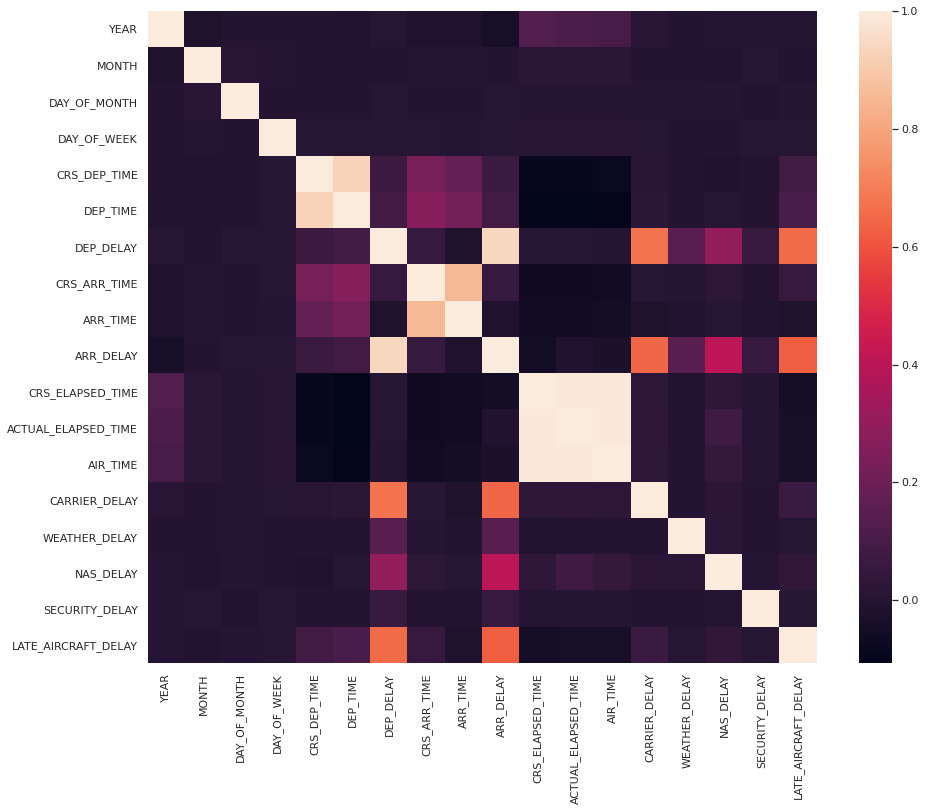

In [ ]:
sns.set(rc = {'figure.figsize':(15,12)})
sns.heatmap(air_vis.corr())

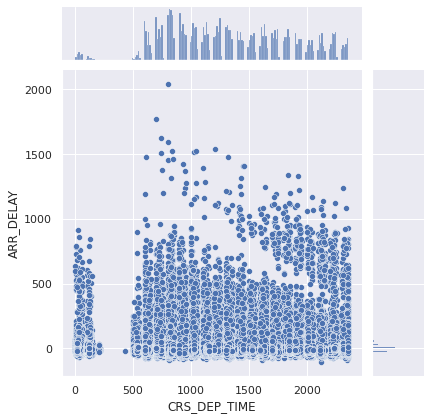

In [ ]:
sns.set(rc = {'figure.figsize':(15,12)})
sns.jointplot(data=air_vis, x="CRS_DEP_TIME", y="ARR_DELAY")

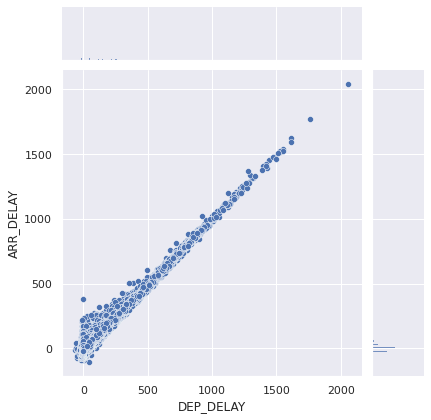

In [ ]:
sns.set(rc = {'figure.figsize':(15,12)})
sns.jointplot(data=air_vis, x="DEP_DELAY", y="ARR_DELAY")

[(-100.0, 400.0)]

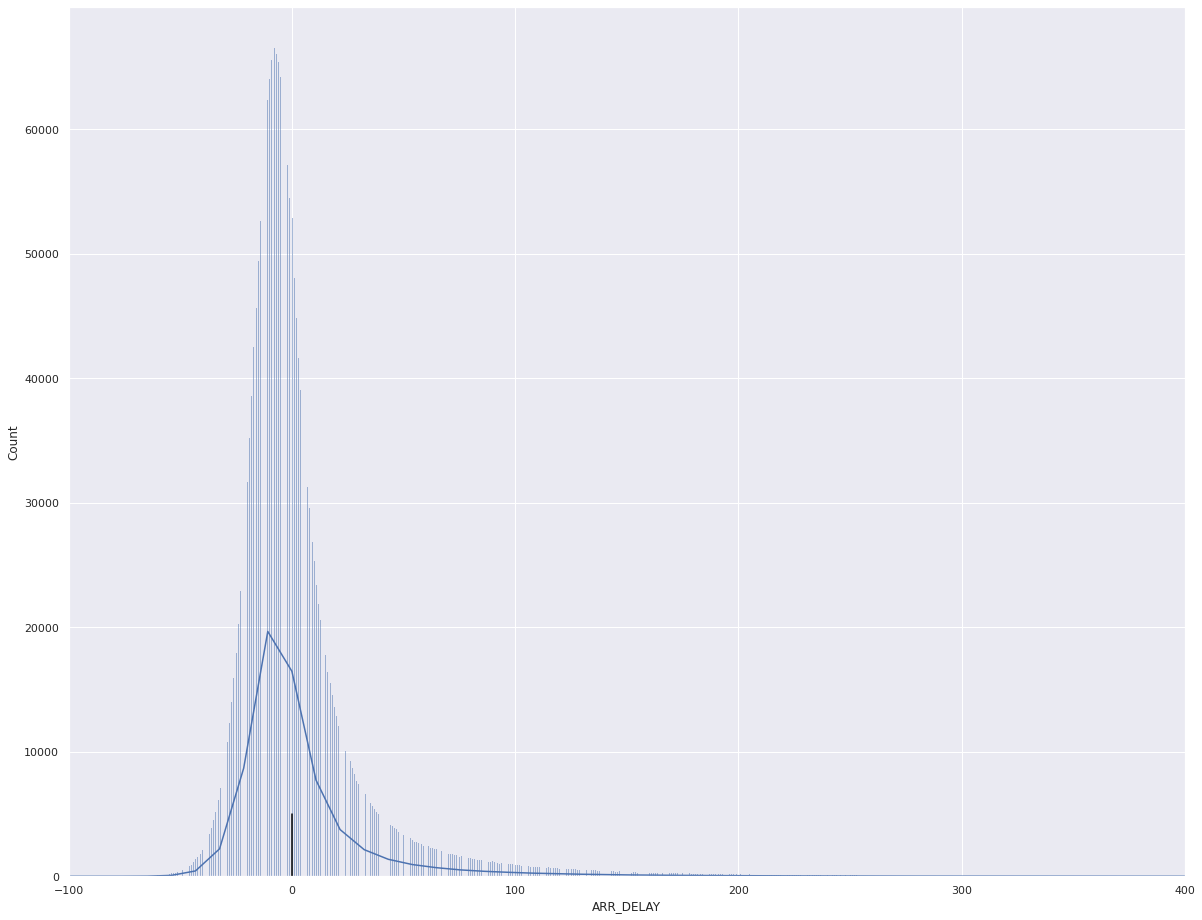

In [ ]:
sns.set(rc = {'figure.figsize':(20,16)})
g = sns.histplot(data=air_vis, x="ARR_DELAY", kde=True )
plt.plot([0,0], [0, 5000], color = 'Black')
g.set(xlim=(-100, 400))

In [ ]:
origin_airport = 'LAX'
dest_airport = 'JFK'
air_final.to_csv('/content/gdrive/My Drive/NEU_DAE/DAE_Projects/IE7275/Project/Dataset/'+ origin_airport +'_'+ dest_airport +'.csv',index=False)